# Data Exploration

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.patches as patches
import pandas as pd
from matplotlib_scalebar.scalebar import ScaleBar

## Floor severity of affected 11 districts

In [2]:

# Load the GeoJSON file
geojson_file = 'dataset/bangladesh_geojson_adm2_64_districts_zillas.json'
gdf = gpd.read_file(geojson_file)
gdf = gdf.rename(columns={'ADM2_EN': 'District'})
gdf

,Shape_Leng,Shape_Area,District,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry
0,12.929816,0.319709,Bagerhat,BD4001,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.84021 21.82784, 89.85325 21..."
1,5.358126,0.401359,Bandarban,BD2003,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.61391 21.85191, 92.61555 21.83217..."
2,4.167970,0.117801,Barguna,BD1004,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.89093 22.15827, 89.89122 22..."
3,7.713625,0.195228,Barisal,BD1006,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.55435 22.59264, 90.54678 22..."
4,10.091155,0.170812,Bhola,BD1009,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.77172 21.85595, 90.77116 21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3.596003,0.221992,Sirajganj,BD5088,None,None,None,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.71534 24.77735, 89.74046 24.76844..."
60,4.741768,0.330139,Sunamganj,BD6090,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((91.70375 25.15103, 91.71268 25.14702..."
61,4.338167,0.305453,Sylhet,BD6091,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.25078 24.83623, 92.24355 24.81952..."
62,3.644558,0.299525,Tangail,BD3093,None,None,None,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.2905 24.27777, 90.30083 24.26936,..."


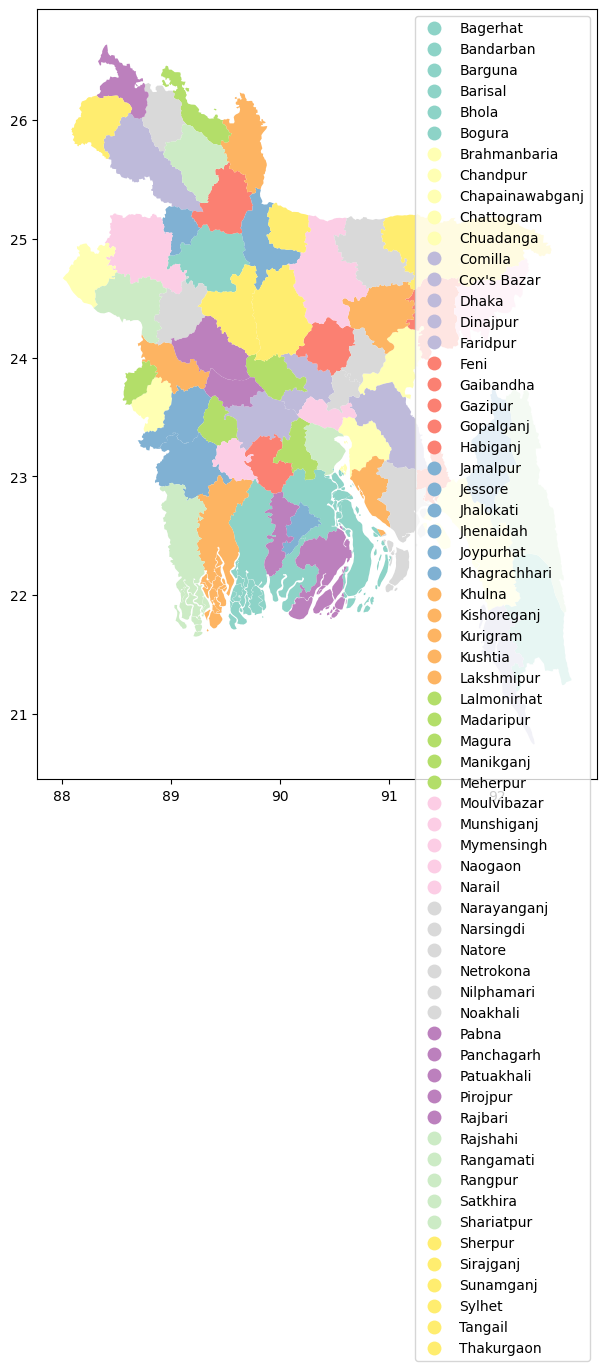

In [3]:
import matplotlib.pyplot as plt

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='District', ax=ax, legend=True, cmap='Set3')

# Show the map
plt.show()

/var/folders/xd/bkg103js7ms2lvxxhsmqkz5r0000gn/T/ipykernel_5667/1292743456.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(severity_districts.geometry.centroid.x, severity_districts.geometry.centroid.y, severity_districts['District']):


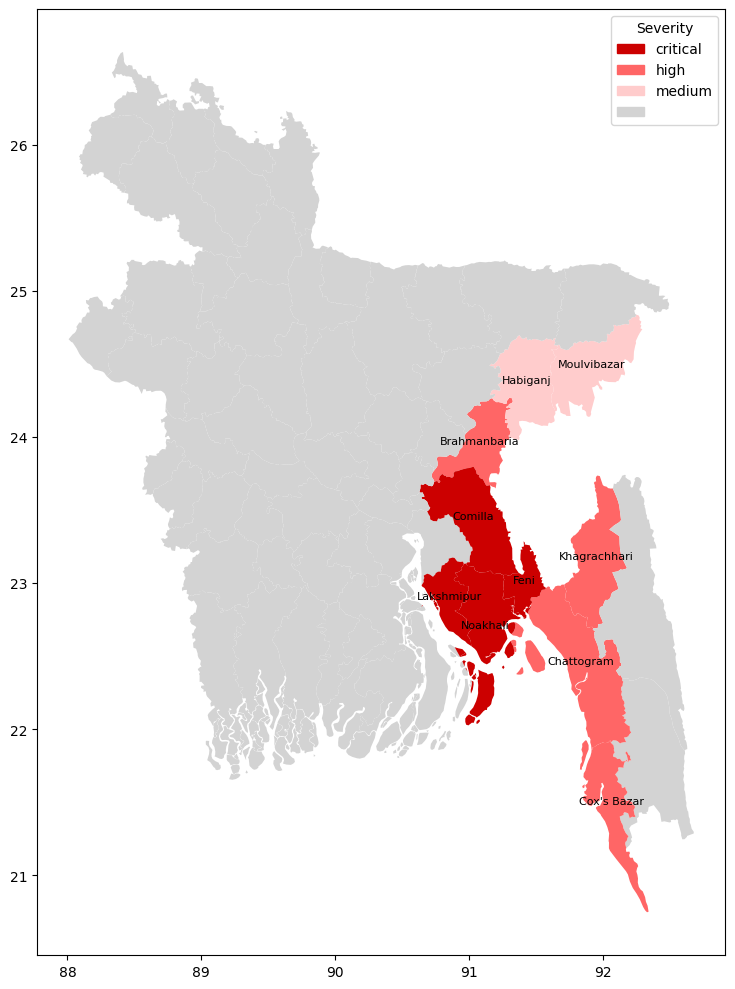

In [4]:
# Define severity based on 'population_density'
def assign_severity(name):
    if name in ['Feni', 'Noakhali', 'Comilla', 'Lakshmipur']:
        return 'critical'
    elif name in ['Brahmanbaria', 'Cox\'s Bazar', 'Khagrachhari', 'Chattogram']:
        return 'high'
    elif name in ['Habiganj', 'Moulvibazar']:
        return 'medium'
    else:
        return None

# selected districts
selected_districts = ['Feni', 'Noakhali', 'Comilla', 'Lakshmipur', 
                      'Brahmanbaria', 'Cox\'s Bazar', 'Khagrachhari', 'Chattogram',
                      'Habiganj', 'Moulvibazar']

gdf['selected_district'] = gdf['District'].apply(lambda x: x if x in selected_districts else np.nan)


# Apply function to 'population_density'
gdf['severity_level'] = gdf['District'].apply(assign_severity)
# Filter GeoDataFrame to include only districts with severity levels
severity_districts = gdf[gdf['severity_level'].notna()]

# Define severity levels and corresponding colors
severity_color_map = {
    'critical': '#cc0000',    # Dark red
    'high': '#ff6666',  # Medium red
    'medium': '#ffcccc',     # Light red
    None: '#d3d3d3'       # Gray for missing values
}

# Apply the color mapping to the 'severity' column
gdf['color'] = gdf['severity_level'].map(severity_color_map)

# Plot the map with the assigned colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['color'])

# Add district names to the map for severity districts only
for x, y, label in zip(severity_districts.geometry.centroid.x, severity_districts.geometry.centroid.y, severity_districts['District']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')
    # Create legend handles
legend_handles = [
    patches.Patch(color=color, label=label) 
    for label, color in severity_color_map.items()
]


# Add a distance scale bar (e.g., 1 km) # fix++
#scalebar = ScaleBar(1, location='lower left', units='km', scale_loc='bottom')
#ax.add_artist(scalebar)

# Add the legend to the plot
ax.legend(handles=legend_handles, title="Severity", loc="upper right")
# Show the map
plt.tight_layout()
plt.savefig('plots/severity_affected_dist.svg', format='svg')
plt.show()

## Population density (district-wise)

In [5]:
df = pd.read_excel('dataset/Districts_of_Bangladesh.xlsx')
# Remove the text from the column
df['District'] = df['District'].str.replace(' District', '', regex=False)

df.head()

,District,Division,Established,Population (thousands)[28],Area (km2)[28]
0,Barguna,Barisal,1984,901,1940
1,Barisal,Barisal,1797,2426,2786
2,Bhola,Barisal,1984,1947,3405
3,Jhalokati,Barisal,1984,711,751
4,Patuakhali,Barisal,1969,1596,3221


In [6]:
gdf = gdf.merge(df[['District', 'Population (thousands)[28]']], on='District', how='left')
gdf = gdf.rename(columns={'Population (thousands)[28]': 'population_density'}) # ++ need to multiple by Shape_area to get actual population_density
gdf

,Shape_Leng,Shape_Area,District,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry,selected_district,severity_level,color,population_density
0,12.929816,0.319709,Bagerhat,BD4001,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.84021 21.82784, 89.85325 21...",NaN,None,#d3d3d3,1461
1,5.358126,0.401359,Bandarban,BD2003,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.61391 21.85191, 92.61555 21.83217...",NaN,None,#d3d3d3,405
2,4.167970,0.117801,Barguna,BD1004,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.89093 22.15827, 89.89122 22...",NaN,None,#d3d3d3,901
3,7.713625,0.195228,Barisal,BD1006,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.55435 22.59264, 90.54678 22...",NaN,None,#d3d3d3,2426
4,10.091155,0.170812,Bhola,BD1009,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.77172 21.85595, 90.77116 21...",NaN,None,#d3d3d3,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3.596003,0.221992,Sirajganj,BD5088,None,None,None,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.71534 24.77735, 89.74046 24.76844...",NaN,None,#d3d3d3,3072
60,4.741768,0.330139,Sunamganj,BD6090,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((91.70375 25.15103, 91.71268 25.14702...",NaN,None,#d3d3d3,2443
61,4.338167,0.305453,Sylhet,BD6091,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.25078 24.83623, 92.24355 24.81952...",NaN,None,#d3d3d3,5316
62,3.644558,0.299525,Tangail,BD3093,None,None,None,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.2905 24.27777, 90.30083 24.26936,...",NaN,None,#d3d3d3,3750


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define a custom colormap from white to black
cmap = mcolors.LinearSegmentedColormap.from_list('white_to_black', ['white', 'black'])

# Normalize the population density for color mapping
norm = mcolors.Normalize(vmin=gdf['population_density'].min(), vmax=gdf['population_density'].max())

# Create a new column for colors based on whether the district is selected
gdf['color_population'] = gdf.apply(
    lambda row: cmap(norm(row['population_density'])) if row['selected_district'] in selected_districts else 'white',  axis=1
)

display(gdf.head(5))

,Shape_Leng,Shape_Area,District,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry,selected_district,severity_level,color,population_density,color_population
0,12.929816,0.319709,Bagerhat,BD4001,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.84021 21.82784, 89.85325 21...",NaN,None,#d3d3d3,1461,white
1,5.358126,0.401359,Bandarban,BD2003,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.61391 21.85191, 92.61555 21.83217...",NaN,None,#d3d3d3,405,white
2,4.167970,0.117801,Barguna,BD1004,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.89093 22.15827, 89.89122 22...",NaN,None,#d3d3d3,901,white
3,7.713625,0.195228,Barisal,BD1006,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.55435 22.59264, 90.54678 22...",NaN,None,#d3d3d3,2426,white
4,10.091155,0.170812,Bhola,BD1009,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.77172 21.85595, 90.77116 21...",NaN,None,#d3d3d3,1947,white


In [8]:
selected_gdf= gdf[gdf['District'].isin(selected_districts)]

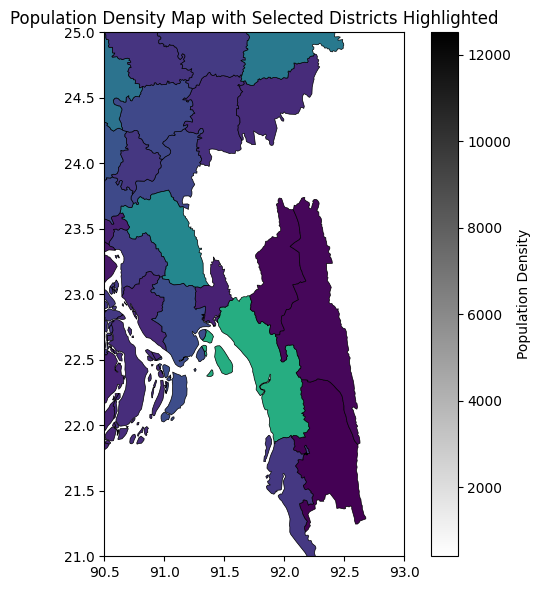

In [9]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(6, 6))


# Add a colorbar for reference (only for selected districts)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=gdf['population_density'].min(), vmax=gdf['population_density'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density')

# Plot with the colors defined
gdf.plot(column='population_density', ax=ax, edgecolor='black', linewidth=0.5)

ax.set_xlim(90.5, 93)
ax.set_ylim(21, 25)

# Set title and other plot properties
ax.set_title('Population Density Map with Selected Districts Highlighted')
# ax.set_axis_off()  # Turn off the axis

plt.tight_layout()

plt.show()


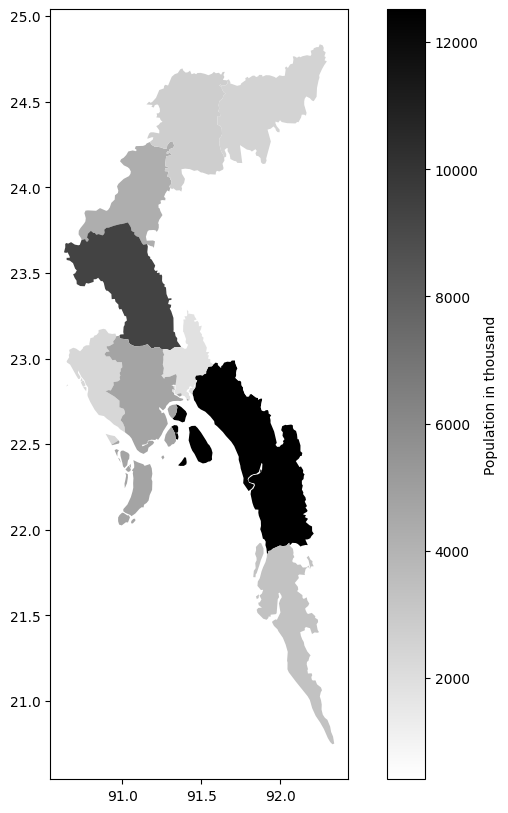

In [10]:
# Plotting
from matplotlib.colors import LinearSegmentedColormap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#ffffff', 'black'])
selected_gdf.plot(column='population_density', cmap=cmap, linewidth=0.8, ax=ax, legend=False)

# Add colorbar
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf['population_density'].min(), vmax=gdf['population_density'].max()))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Population in thousand')
plt.savefig('plots/population_density.svg', format='svg')
plt.show()


In [11]:
shelter = gpd.read_file('dataset/BD_Cyclone_Shelter_Center.geojson')
shelter.head()

,ShelterNam,Capacity,Lat,Long,geometry
0,Zinzira gprs cum shelter.,1500.0,20.5924,92.3312,POINT (92.33118 20.59243)
1,Sentmartin puratan cyclone center,1200.0,20.6322,92.3247,POINT (92.32471 20.6322)
2,Shah Porir Dwip GPS,1500.0,20.7657,92.3347,POINT (92.33471 20.76571)
3,Dangar Para Red Cresent RPS,850.0,20.7673,92.3227,POINT (92.32271 20.76732)
4,24 no Shahp Darir Dwip Jaliapara GPS,1500.0,20.7807,92.3380,POINT (92.33801 20.78072)


In [12]:
print('Max Capacity: ', shelter['Capacity'].max())
print('Min Capacity: ', shelter['Capacity'].min())
print('Total no. of shelters: ', shelter.shape[0])
print('Total capacity of shelters (in million): ', round(shelter['Capacity'].sum()/1e6, 1))

# print('Total capacity of shelters in Feni (in million): ', round(shelter.loc[shelter['Category'] == 'A', 'Revenue'].sum() ))



Max Capacity:  2500.0
Min Capacity:  0.0
Total no. of shelters:  3777
Total capacity of shelters (in million):  3.8


In [13]:
gdf_map = gpd.read_file('dataset/bangladesh_geojson_adm2_64_districts_zillas.json')
gdf_map = gdf_map.rename(columns={'ADM2_EN': 'District'})
# selected districts
selected_districts = ['Feni', 'Noakhali', 'Comilla', 'Lakshmipur', 
                      'Brahmanbaria', 'Cox\'s Bazar', 'Khagrachhari', 'Chattogram',
                      'Habiganj', 'Moulvibazar']

gdf_map['selected_district'] = gdf_map['District'].apply(lambda x: x if x in selected_districts else np.nan)


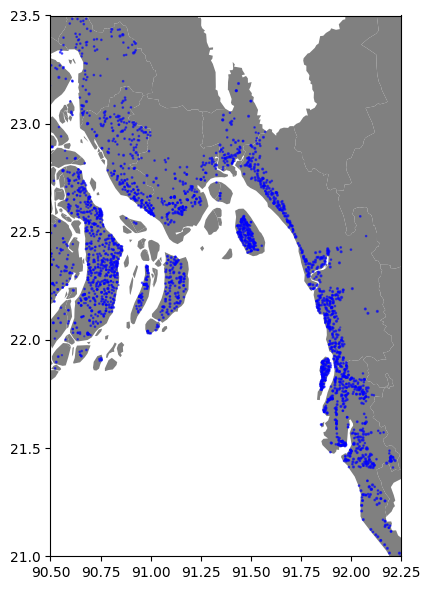

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

gdf_map.plot(ax=ax, color='gray') # color=gdf['color']

shelter.plot(
    ax=ax,                # Size of the plot
    marker='o',                      # Marker type
    markersize=shelter['Capacity']/1000,   # Size based on the column
    color='blue',                    # Color of the markers
    alpha=0.6,                       # Transparency level
)


ax.set_xlim(90.5, 92.25)
ax.set_ylim(21, 23.5)



plt.tight_layout()
plt.savefig('plots/shelters.svg', format='svg')
plt.show()


## Feni

In [22]:
one_district = gdf_map[gdf_map['selected_district'] == 'Feni']
one_district

,Shape_Leng,Shape_Area,District,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry,selected_district
15,2.949855,0.079876,Feni,BD2030,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((91.3311 22.8175, 91.32814 22.7...",Feni


In [16]:
def check_within(point, polygons):
    """Check if a point is within any of the given polygons."""
    return any(point.within(polygon) for polygon in polygons.geometry)

shelter['within_area'] = shelter.geometry.apply(lambda x: check_within(x, one_district))

# Filter points that are within any area
points_within_areas = shelter[shelter['within_area']]
points_within_areas

points_within_areas['markersize'] = points_within_areas['Capacity'] / 80  

/Users/tanmoydas/Applications/anaconda3/envs/Freelancing/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## Road network

In [17]:
road_gdf = gpd.read_file('dataset/bgd_trs_roads_lged/bgd_trs_roads_lged.shp')
display(road_gdf.head())
print(road_gdf['FType'].unique())
# display(road_gdf.head())
condition1 = road_gdf['District'] == 'Feni'
condition2 = road_gdf['FType']=='National Highway'
feni_road_national_highway_gdf = road_gdf[condition1 & condition2]
#feni_road_national_highway_gdf
condition3 = road_gdf['FType']=='Regional Highway'
feni_road_regional_highway_gdf = road_gdf[condition1 & condition3]

#condition4 = road_gdf[road_gdf['FType'].isin(['National Highway', 'Regional Highway', 'Upazila Road', 'Zila Road'])] #++
# Correct usage with a list

#df[df['Category'].isin(values_to_match)]
# feni_road_gdf = road_gdf[(condition1 & condition4)]

,RD_COND,COND_WS,TOTLENGTH,CRESTWIDTH,LGEDcode,FType,RoadType,RoadName,Division,District,Upazila,Shape_Leng,geometry
0,None,VILLAGE A_KATCHA,4.75,2.00,4016,Village Road A,Katcha,Asanullah Diggi-Baripayka Natun hat via Rarok ...,Barisal,Barisal,Agailjhara,384.636784,"LINESTRING (90.20268 22.90076, 90.20362 22.900..."
1,None,VILLAGE B_KATCHA,4.00,1.82,5009,Village Road B,Katcha,Chaygram hat to solok U.P. border via kazi A. ...,Barisal,Barisal,Agailjhara,138.039739,"LINESTRING (90.20128 22.90173, 90.20126 22.90048)"
2,None,VILLAGE A_KATCHA,4.75,2.00,4016,Village Road A,Katcha,Asanullah Diggi-Baripayka Natun hat via Rarok ...,Barisal,Barisal,Agailjhara,180.040854,"LINESTRING (90.20128 22.90173, 90.20144 22.901..."
3,None,VILLAGE B_KATCHA,3.50,1.50,5010,Village Road B,Katcha,Sholok U.P. border to Thaneswarkati road.,Barisal,Barisal,Agailjhara,258.446964,"LINESTRING (90.19909 22.90213, 90.20033 22.901..."
4,None,VILLAGE B_KATCHA,4.00,1.82,5009,Village Road B,Katcha,Chaygram hat to solok U.P. border via kazi A. ...,Barisal,Barisal,Agailjhara,334.239172,"LINESTRING (90.20186 22.90467, 90.20164 22.903..."


['Village Road A' 'Village Road B' 'Union Road' 'Upazila Road' 'Zila Road'
 'Regional Highway' 'National Highway']


In [18]:
!pip install contextily

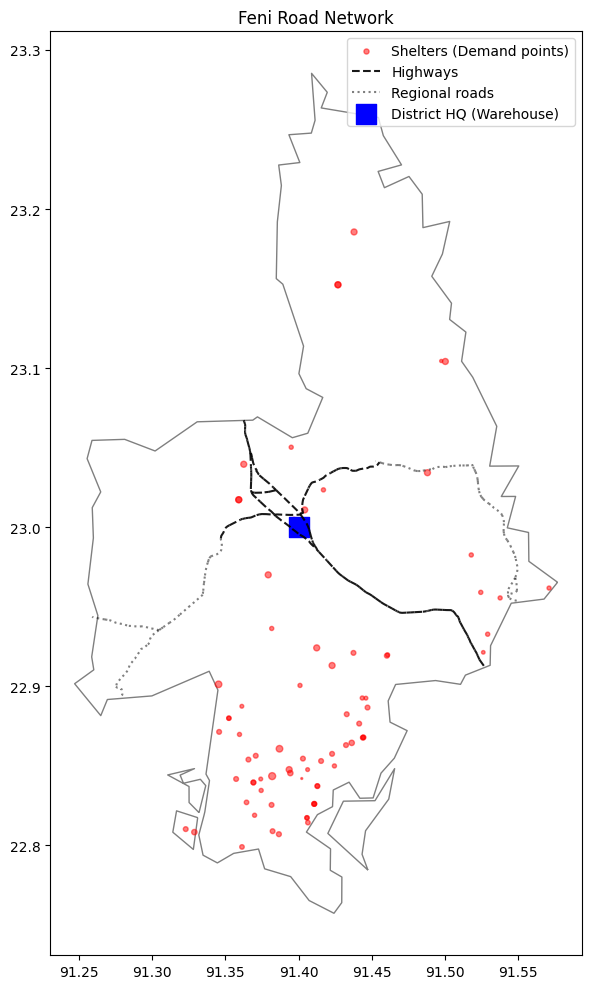

In [36]:
import contextily as ctx
# one_district = one_district.to_crs(epsg=3857)
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))
one_district.plot(ax=ax, alpha=0.5, edgecolor='k', color='white')  
# may not need to change projection++ openstreet map +++

# Add the Apple Maps-style basemap
# ctx.add_basemap(ax)

# Plot the selected area
# ax = one_district.plot(figsize=(10, 10), color='white', edgecolor='black',  label='District boundary')
points_within_areas.plot(ax=ax, color='red', markersize='markersize', alpha=0.5,  label='Shelters (Demand points)')
# Add title and other plot customizations if desired

# Plot the GeoDataFrame
feni_road_national_highway_gdf.plot(ax=ax, edgecolor='black', linestyle='--', alpha=0.9,  label='Highways')
feni_road_regional_highway_gdf.plot(ax=ax, edgecolor='black', linestyle=':', alpha=0.5,  label='Regional roads')

ax.scatter(91.4, 23, marker='s', s=200, color='b', alpha=1, label='District HQ (Warehouse)')
ax.set_title('Feni Road Network')
plt.legend()
plt.tight_layout()
plt.savefig('plots/Feni road network.svg')
plt.show()


# Feature Engineering